# Tree Based Model

## 1. Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

Kita akan gunakan data diabetes.csv

In [2]:
data = pd.read_csv('diabetes.csv')
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Targetnya adalah kita akan prediksi mana yang aman dan terkena diabetes. 1 artinya kena diabetes, 0 artinya aman dari diabetes

## 2. Simple Analyze Data

Kita akan mencoba sedikit menganalisis data, kita akan lihat jumlah tiap kelas pada **Outcome**, melihat informasi data, dan melihat statistik data

In [3]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

terdapat 768 data, dimana 500 bebas dari diabetes dan 268 terkena diabetes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


tidak ada missing value

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


hasil di atas adalah hasil statistik dari data

## 3. Choosing Feature

Sebenarnya kita bisa menggunakan banyak fitur, tetapi karena kita ingin menggambarkan plotnya jadi kita hanya bisa menggunakan dua fitur. Untuk memilih fiturnya kita akan memilih berdasarkan correlation

In [6]:
data.corr()['Outcome'][:]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Korelasi terhadap **Outcome** yang terbesar terdapat pada fitur **Glucose** dan **BMI**

In [7]:
X = data[['Glucose', 'BMI']]
y = data['Outcome']

Split train dan test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

Cek value counts dari y_train dan y_test

In [9]:
y_train.value_counts()

0    396
1    218
Name: Outcome, dtype: int64

In [10]:
y_test.value_counts()

0    104
1     50
Name: Outcome, dtype: int64

## 4. Create Model

Sekarang kita akan membuat model decision tree, random forest, dan gradient boosting lalu kita akan langsung melakukan prediksi terhadap data test

In [11]:
model_dc = DecisionTreeClassifier(criterion='entropy')
model_rf = RandomForestClassifier(criterion='entropy')
model_gb = GradientBoostingClassifier()

Lakukan training atau fitting data

In [12]:
model_dc.fit(X_train,y_train)
model_rf.fit(X_train,y_train)
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

lakukan predict data

In [13]:
predict_dc = model_dc.predict(X_test)
predict_rf = model_rf.predict(X_test)
predict_gb = model_gb.predict(X_test)

In [14]:
pd.DataFrame({
    'Actual' : y_test,
    'Decision Tree' : predict_dc,
    'Random Forest' : predict_rf,
    'Gradient Boost' : predict_gb
})

,Actual,Decision Tree,Random Forest,Gradient Boost
195,1,0,0,1
51,0,0,0,0
66,1,0,0,0
437,0,0,0,1
665,0,0,0,0
382,0,0,0,0
99,1,1,0,1
656,0,0,0,0
394,1,1,1,1
353,0,0,0,0


## 5. Result Visualization

Sekarang kita akan mencoba untuk membuat visualisasi hasil dari model yang kita buat

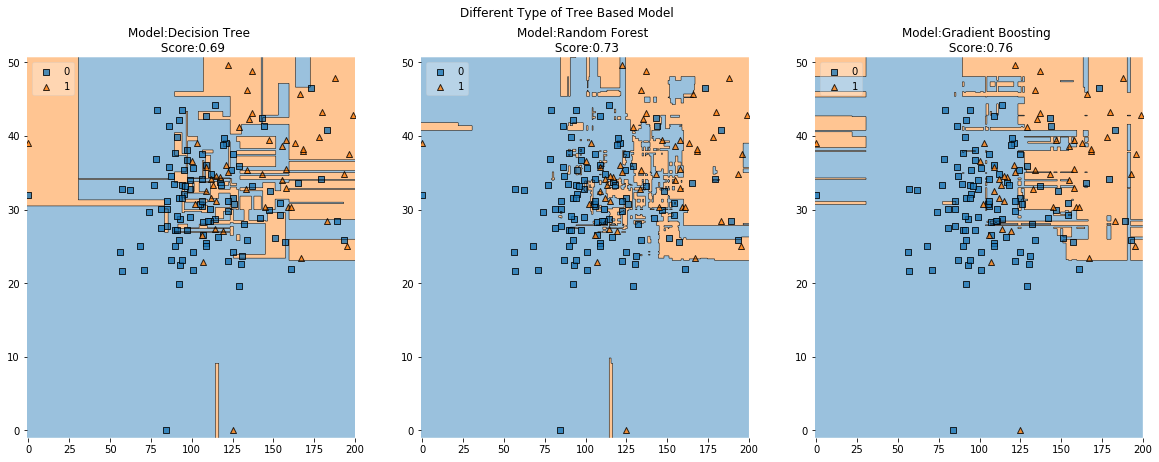

In [15]:
model = [model_dc, model_rf, model_gb]
model_name = ['Decision Tree','Random Forest', 'Gradient Boosting']
plt.figure(figsize=(20,7))
plt.suptitle('Different Type of Tree Based Model')
for i in range(3):
    plt.subplot(1,3,i+1)
    plot_decision_regions(X = X_test.values, y=y_test.values, clf = model[i],
    legend = 2)

    plt.title("Model:%s \n Score:%1.2f" % (model_name[i], model[i].score(X_test,y_test)))

## 6. Visualize Tree

gunakan library graphviz yang sebelumnya didapatkan dari **pip install graphviz**

Cara install :
- download graphviz 2.38 di https://graphviz.gitlab.io/_pages/Download/Download_windows.html download yang msi
- add to path folder bin sama dot.exe yang di dalem bin
- pip install graphviz di cmd

#### Import Packages

In [16]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from graphviz import Source

#### Let's Draw

buat list label nya dulu

In [17]:
labels = X.columns

buat plotnya

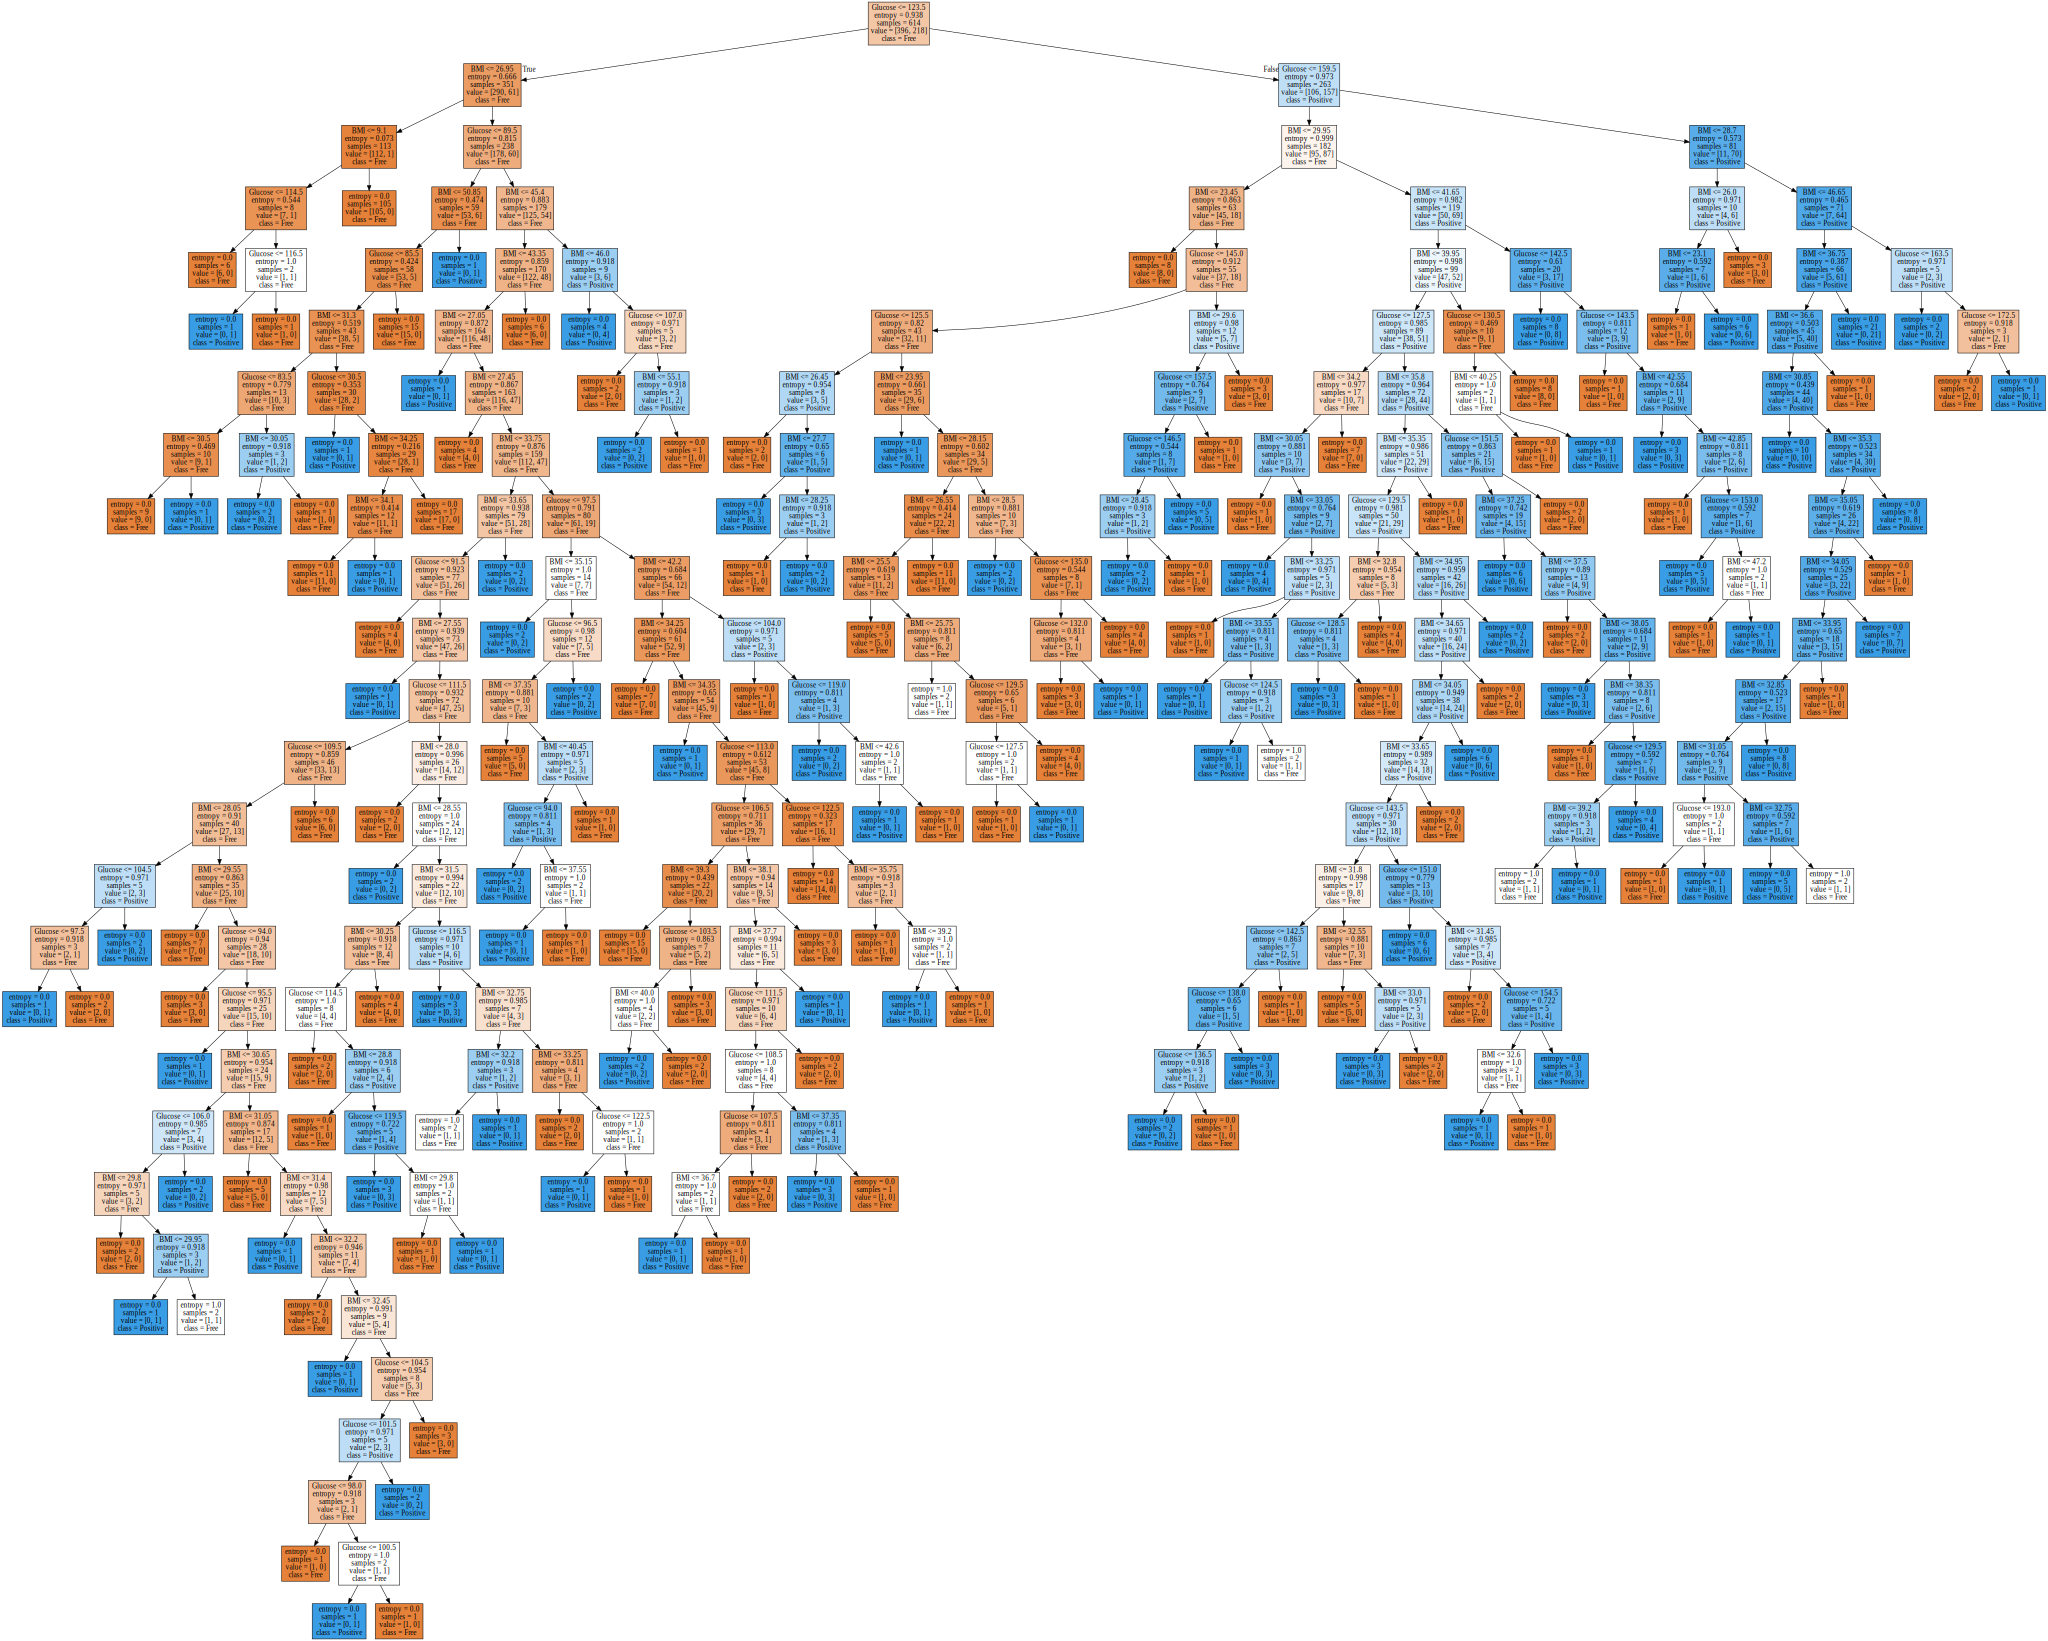

In [18]:
graph = Source(tree.export_graphviz(model_dc,
out_file = None, feature_names = labels 
                , class_names = ['Free', 'Positive']
                , filled = True))

display(SVG(graph.pipe(format='svg')))

## 7. Interactive Visualization

Sekarang kita akan buat visualisasi yang atraktif

In [19]:
from ipywidgets import interactive

In [29]:
# class labels
labels = X.columns
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):

    estimator = DecisionTreeClassifier(random_state = 45
    , criterion = crit
    , splitter = split
    , max_depth = depth
    , min_samples_split=min_split
    , min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)

    graph = Source(tree.export_graphviz(estimator
    , out_file=None
    , feature_names=labels
    , class_names=['Free','Positive']
    , filled = True))

    display(SVG(graph.pipe(format='svg')))

    return estimator

inter=interactive(plot_tree
, crit = ["gini","entropy"]
, split = ["best","random"]
, depth=[1,2,3,4]
, min_split=(1,100)
, min_leaf=(1,50))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Nah tadi itu adalah visualisasi yang atraktif. Keuntungannya kalau kita pakai model gambar tree kayak gini itu bisa lebih dari 2 fitur gak kayak kalo pake plot_decision_regions yang cuma bisa dua fitur doang